<h1>Trends in Startup/Small Scale IT Firms</h1>

This notebook is a small analysis to understand some of the menial trends in startups/Small Scale IT firms.

All current major firms or MNC’s like Google, Facebook, Apple , etc . have been at some point of their life cycle a Startup/Small Scale firms. Thus understanding the current ecosystem in these firms might give us the insight on how these firms work. Some of these firms might even turn out to be future MNC’s. This post will walk you through some of the more common thoughts or questions raised when someone sees a startup/small scale firm.

The following questions would be answered using the stack-overflow data set for Startup/Small Scale IT firms :

1. Percentage of People working in Startup/Small Scale firms out of the total survey received.
2. Average Age
3. Average Salary
4. Languages used
5. Operating system used
6. Version Control Used
7. Percentage of people working as a Hobby

The data set which will be used in this notebook is taken from kaggle which is contributed by Stackoverflow. The data can be found [here](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey).Let us first load the dataset which is from kaggle and have a look.

In [51]:
#Importing dependent modules
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [52]:
raw_data = pd.read_csv('../input/survey_results_public.csv',dtype=str)
raw_data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10,7,8,1,2,5,3,4,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,...,7,2,6,3,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1,7,10,8,2,5,4,3,6,9,1,5,3,7,10,4,11,9,6,2,8,3,1,...,4,6,7,2,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year a

As we can see the data seems to be straight forward with some columns which have to be engineered. Let us look at the shape of the data 

In [53]:
raw_data.shape

(98855, 129)

There were 98855 surveys which have been provided by stack-overflow with 129 columns containing various types of information. For the sake of this analysis we will not be considering all the columns and will only consider few columns as below

In [54]:
columns_selected_for_analysis= ['Hobby','OpenSource','Country','Student','Employment',
                                'FormalEducation','UndergradMajor','CompanySize','DevType',
                                'YearsCoding','YearsCodingProf','JobSatisfaction','CareerSatisfaction',
                                'SalaryType','ConvertedSalary','CommunicationTools','TimeFullyProductive',
                                'EducationTypes','SelfTaughtTypes','LanguageWorkedWith',
                                'LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear',
                                'PlatformWorkedWith','PlatformDesireNextYear','FrameworkWorkedWith',
                                'FrameworkDesireNextYear','IDE','OperatingSystem','Methodology',
                                'VersionControl','CheckInCode','WakeTime','HoursComputer','HoursOutside',
                                'SkipMeals','Gender','Age']

In [55]:
analysis_data = raw_data[columns_selected_for_analysis]
analysis_data.shape

(98855, 38)

We have only selected 38 columns which might be relevant. Let us look at the entire data stats and columns stats.

In [56]:
analysis_data.describe()

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,SalaryType,ConvertedSalary,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,WakeTime,HoursComputer,HoursOutside,SkipMeals,Gender,Age
count,98855,98855,98443,94901,95321,94703,79036,71531,92098,93835,77903,69276,76504,51070,47702,56970,51872,67960,57354,78334,73244,66270,57498,65999,61353,51620,55218,75398,76179,58981,74298,72355,72146,72133,72024,71946,64469,64574
unique,2,2,183,3,6,9,12,8,9568,11,11,7,7,3,7473,1149,6,494,471,26678,28657,6877,10028,9320,13704,1014,1786,7884,4,480,90,6,11,5,5,4,15,7
top,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer,3-5 years,0-2 years,Moderately satisfied,Moderately satisfied,Monthly,0,"Office / productivity suite (Microsoft Office,...",One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,C#;JavaScript;SQL;HTML;CSS,Python,MySQL,MySQL,Windows Desktop or Server,Linux,.NET Core,Node.js;React,Visual Studio;Visual Studio Code,Windows,Agile;Scrum,Git,Multiple times per day,Between 7:01 - 8:00 AM,9 - 12 hours,1 - 2 hours,Never,Male,25 - 34 years old
freq,79897,55769,20309,70399,70495,43659,50336,16996,6417,23313,23421,26005,27926,26252,842,3523,23163,6900,3426,1347,908,5968,2889,5419,3793,4517,3797,2548,38022,9724,44133,43566,21250,37983,27788,45772,59458,31759


In [57]:
for col in analysis_data.columns :
    print(col)
    print(analysis_data[col].value_counts())
    print()

Hobby
Yes    79897
No     18958
Name: Hobby, dtype: int64

OpenSource
No     55769
Yes    43086
Name: OpenSource, dtype: int64

Country
United States                            20309
India                                    13721
Germany                                   6459
United Kingdom                            6221
Canada                                    3393
Russian Federation                        2869
France                                    2572
Brazil                                    2505
Poland                                    2122
Australia                                 2018
Netherlands                               1841
Spain                                     1769
Italy                                     1535
Ukraine                                   1279
Sweden                                    1164
Pakistan                                  1050
China                                     1037
Switzerland                               1010
Turkey            

Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                                                                                                                                                                                                                     6900
Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                                                                                                                                         4509
Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source softw

Agile;Scrum                                                                                                                                                                                         9724
Agile                                                                                                                                                                                               8632
Agile;Kanban;Scrum                                                                                                                                                                                  5351
Agile;Kanban;Pair programming;Scrum                                                                                                                                                                 2476
Agile;Pair programming;Scrum                                                                                                                                                                        

It seems there are quite a few columns which have Null values. They will be handled individually as the questions are answered. 

Since this analysis is for Startup/Small Scale IT firms, we would have to select only companies with less than 100 employees (this is a personal selection and you can change it based on your preference).

In [58]:
#Limiting the data to only companies having less than 100 employees
data=analysis_data[analysis_data['CompanySize'].isin([
    '20 to 99 employees','10 to 19 employees','Fewer than 10 employees'])]

In [59]:
data.shape

(32482, 38)

We have now about 32K records to work with for the analysis . Seems to be a decent amount though.

Let us check what percent of total data does it form

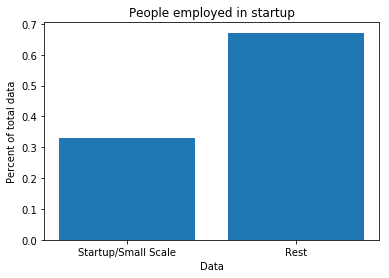

In [60]:
#Determing the perentage of people in startup/smallscale IT frim
x=['Startup/Small Scale', 'Rest']
y=[len(data)/len(analysis_data),(len(analysis_data)-len(data))/len(analysis_data)]
plt.bar(x,y)
plt.xlabel('Data')
plt.ylabel('Percent of total data')
plt.title('People employed in startup');

That sums up to more than 30% of the entire population of the survey data are in startup/smallscale firms. This bolsters the importance of the analysis even more.

Let us check null values in each of the columns.

In [61]:
#Checking null values in each column
data.isnull().sum()

Hobby                          0
OpenSource                     0
Country                        0
Student                      449
Employment                     0
FormalEducation              625
UndergradMajor              4155
CompanySize                    0
DevType                      349
YearsCoding                   26
YearsCodingProf             4474
JobSatisfaction             5147
CareerSatisfaction          4943
SalaryType                 13121
ConvertedSalary            14382
CommunicationTools         10410
TimeFullyProductive         9730
EducationTypes              9172
SelfTaughtTypes            12892
LanguageWorkedWith          5356
LanguageDesireNextYear      7268
DatabaseWorkedWith          8318
DatabaseDesireNextYear     11695
PlatformWorkedWith          9159
PlatformDesireNextYear     11057
FrameworkWorkedWith        13916
FrameworkDesireNextYear    12800
IDE                         6326
OperatingSystem             6137
Methodology                11329
VersionCon

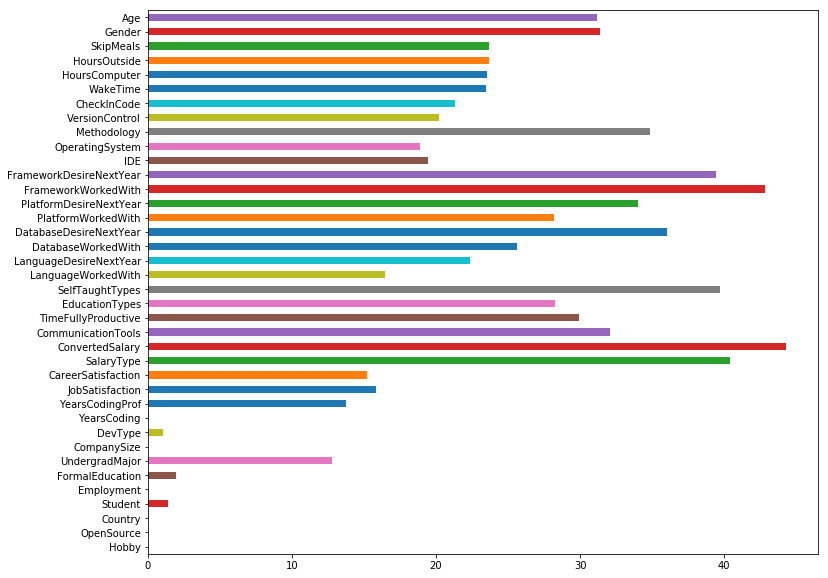

In [62]:
null_col_data=data.isnull().sum()/len(data)*100
null_col_data.plot(kind='barh',figsize=(12,10));

We can see that although there are null values in many of the columns , but the percentage of null values in any column is not more than 50%. Thus while analysis we can safely remove or not consider the null value records.

Let us start with the analysis for the quesions mentioned above in the notebook.

Since there will be many plots in this notebook making a function for the same seems like a good idea

In [63]:
#Function which plots bar and barh graphs
def plot_bar_graph(df_series, kind='bar', figsize=(10,10),rot=0, x_label=None, y_label=None,title=None):
    '''
    input :
    df_series: Series dataframe object which is to be plotted. 
                Index values taken as x-axis and values as y-axis by defaiul.
    kind : 'bar','barh' (str object).
           Specifies the type of bar graph
    figsize : (x,y) touple object . Determines the dimensions of the figure 
    rot : rotating the x ticks (integer)
    
    Output : plots bar graph and/or saves the image depending on the save argument 
    
    This functions takes a series object and plots the bar graph 
    '''
    plot_object=df_series.plot(kind=kind,rot=rot,title=title,figsize=figsize)
    plot_object.set_xlabel(x_label)
    plot_object.set_ylabel(y_label);
        

> ***1. Percentage of People working in Startup/Small Scale firms out of the total survey received.***

As seen above about 30% of the people work in startup/smallscale firms. Further distribution of them can be found country wise as below.

In [64]:
data_country_wise=data['Country'].value_counts()*100/len(data)

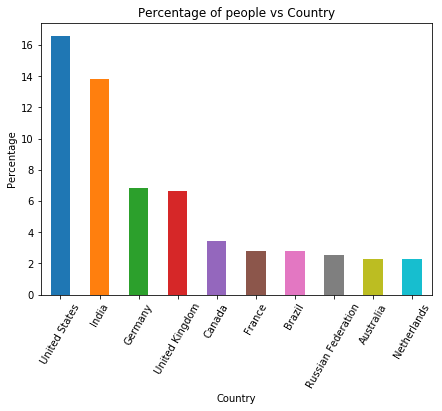

In [65]:
#Considering only top 10 
data_country_wise=data_country_wise.sort_values(ascending=False)[:10]
plot_bar_graph(data_country_wise,kind='bar',rot=60,title='Percentage of people vs Country',figsize=(7,5),
              x_label='Country',y_label='Percentage')

Seems like US and India are currently booming in the number of Startup/Small Scale IT firms with an astonishing 16 and 14 percentage respectively of the total people who participated being from them.

> ***2. Average Age***

Average Age in this case signifies how young the workforce in the company is and generally more young the workforce the more creative and out of the box thinking capability as they have not gotten accustomed to the “ways of the industry”. At the same time the higher average age tend to signify more experience,less errors in work and more structured way of thinking. There have been many speculations on the average age found in these firms.

Let us check the average age.

In [66]:
data['Age'].value_counts().sum()

22357

Seems like we have about 10,000 null values. We will ignore this and plot the distribution raph for age

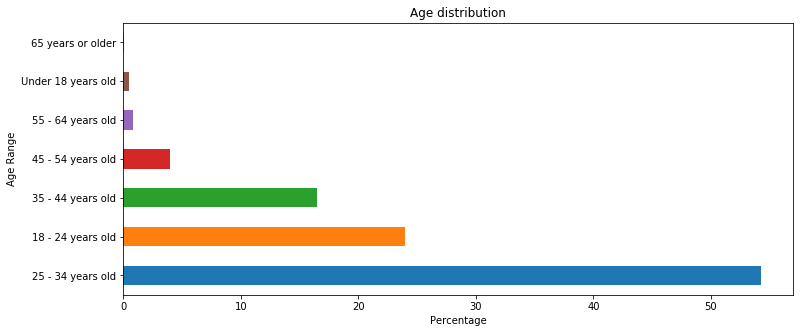

In [67]:
age_total_cnt=data['Age'].value_counts().sum()
age_distribution_data=data['Age'].value_counts()/age_total_cnt*100
plot_bar_graph(age_distribution_data,kind='barh',rot=0,title='Age distribution',figsize=(12,5),
              x_label='Percentage',y_label='Age Range')

As per the plot , the average age should be between 25-30  years. But looking at the data it is based on range of age rather than an integer number. So we will engineer a new feature called AgeMean which will basically be the mean of the range.

In [68]:
def get_mean_age_value(x):
    '''
    input:
    X(str) - String object
    optupt :
    Returns value based on string 
    
    Returns middle value for the different date ranges
    '''
    
    if x == 'Under 18 years old' :
        return 18
    elif x == '18 - 24 years old' :
        return (18+24)/2
    elif x == '25 - 34 years old' :
        return (25+34)/2
    elif x == '35 - 44 years old' :
        return (35+44)/2
    elif x == '45 - 54 years old' :
        return (45+54)/2
    elif x == '55 - 64 years old' :
        return (55+64)/2
    elif x == '65 years or older' :
        return 65

In [69]:
#adding a new engineered column AgeMean
data['AgeMean'] = data['Age'].apply(lambda x : get_mean_age_value(x) if x is not np.nan else np.nan )



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
#Getting the mean 
data['AgeMean'].mean()

30.120320257637427

Since we have taken the mean and not the exact age , average might differ so considering the average between 25-30 

> ***Average Salary***

It might be one of the most important factor for a salaried worker. I do not have to explain much in this aspect. Currently the ConvertedSalary is in string type, so for the analysis we will convert it to float type


In [71]:
data['ConvertedSalary']=data['ConvertedSalary'].astype(float);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


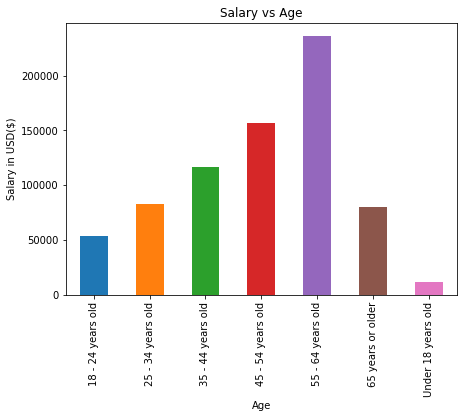

In [72]:
#Plotting the graph for mean salary for each age range 
salary_data=data.groupby(['Age']).mean()['ConvertedSalary']
plot_bar_graph(salary_data,kind='bar',rot=90,title='Salary vs Age',figsize=(7,5),
              x_label='Age',y_label='Salary in USD($)')


In [73]:
#Getting the average salary
data.ConvertedSalary.mean()

85099.82359116022

As per the above plot it can be seen that the maximum average income is of the age group of 55–64 years . Which seems logical as they might be at a higher post compared to the rest. Also the gradual salary rise with age and then fall after 65 years (retirement) perfectly aligns with the logical view in present day.

Let us see the distribution of Salary with respect to the formal education

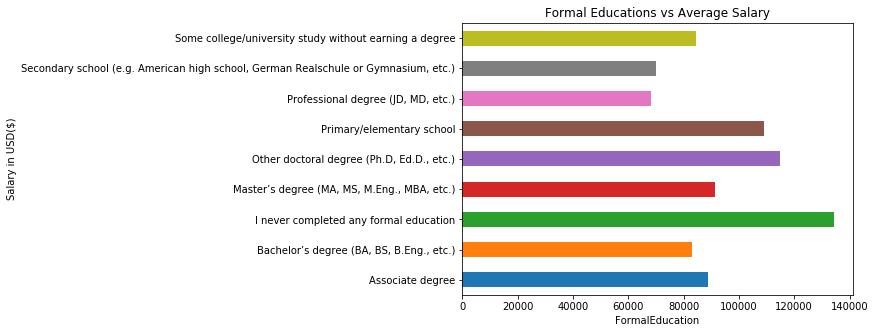

In [74]:
salary_data_education=data.groupby(['FormalEducation']).mean()['ConvertedSalary']
plot_bar_graph(salary_data_education,kind='barh',rot=0,title='Formal Educations vs Average Salary',figsize=(7,5),
              x_label='FormalEducation',y_label='Salary in USD($)')


Oh! what is this ? I see that people who have not completed any formal education are at the top ? Well many prominent leadership of a startup/small scale IT firm have not necessarily completed their studies. Next seems people who have done their post graduation like PhD, MS, etc. which seems alright.

> ***Languages Used ***

The languages mentioned here pertain to the different programming languages which the people have either worked with or are working with. The data for Language is in the form Lang1;Lang2; . We will need to extract the languages used count the maximum number of people using a particular language. This can be done in a function called get_split_count

In [75]:
#Function to split the srting and get the count
def get_split_count(df,m=10):
    '''
    input : df (dataframe) : data to be split and counted.
            m : (int) to get the top m entries default 10
    output : pandas Series object which has entries as index and the count as values.
    
    This function is used to get the split count of the data which is seperated by  ;
    
    '''
    
    lang_dict=dict()
    len_df=len(df)
    for i in range(len_df) :
        lang_str =df.iloc[i]
        if lang_str is not np.nan :
            lang_list = lang_str.split(';')
            for lang in lang_list :
                if lang in lang_dict :
                    lang_dict[lang] += 1
                else :
                    lang_dict[lang] = 1
    lang_dict=pd.Series(lang_dict,index=lang_dict.keys()).sort_values(ascending=False)[:m]
    lang_dict=lang_dict/len_df*100
    return lang_dict

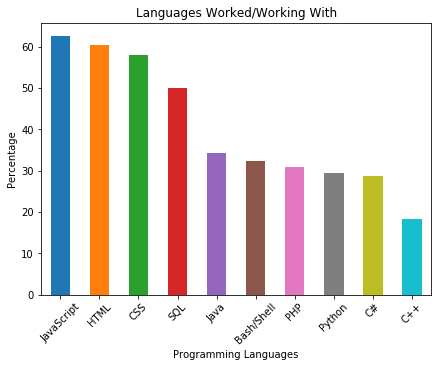

In [76]:
#Get top 10 languages
lang_worked_with = get_split_count(data['LanguageWorkedWith'])
#Plot
plot_bar_graph(lang_worked_with,kind='bar',rot=45,title='Languages Worked/Working With',figsize=(7,5),
              x_label='Programming Languages',y_label='Percentage')

This graph shows top 10 of all the Languages. It can be seen that JavaScript,HTML,CSS are used by more than 50% of the people. It means that 1 in every 2 startups are using any or combination of these three languages. This goes to show how readily available and robust these languages are.

Let us check for Languages that people desire to work with next year. The data is similar to the languages data. So the same function can be used.

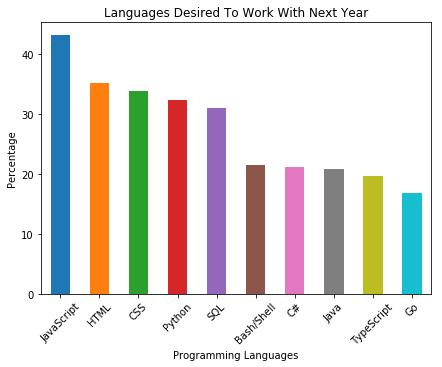

In [77]:
#Plot top 10 lang desired next year
plot_bar_graph(get_split_count(data['LanguageDesireNextYear']),kind='bar',rot=45,title='Languages Desired To Work With Next Year',figsize=(7,5),
              x_label='Programming Languages',y_label='Percentage')

Still JavaScript, HTML and CSS remain on the top 3 of the languages people desire to work with during their next year. But surprisingly there is Python at the 4th place which overtook SQL as well as Java.

> ***Operating Systems Used***

An operating system basically is a software through which you interact with the computer or server and different programs. Some examples of operating systems used can be Windows, MacOS, etc.


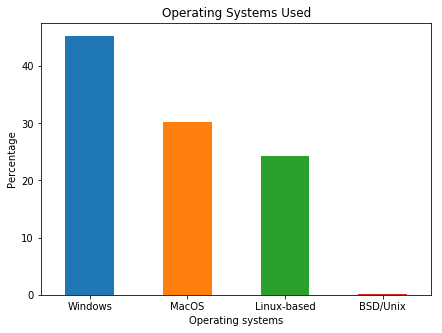

In [78]:
os_data=data['OperatingSystem'].value_counts()
os_data_len=data['OperatingSystem'].value_counts().sum()
os_data=os_data/os_data_len*100
plot_bar_graph(os_data,kind='bar',rot=0,title='Operating Systems Used',figsize=(7,5),
              x_label='Operating systems',y_label='Percentage')

It can be seen that more than 40% of the people use Windows as an operating system. This is followed by MacOS and Linux. One of the reason Windows is preferred is due to its simplicity to use and availability.

> ***Version Control Used***

Version Control systems are software which manage/log each change done in a file. This is especially useful for backtracking a code or reverting or looking at the history of the code used in any application or software. They are very important in situations wherein a bunch of people work on the same code. The data is similar to Languages data in that the value string is seperated by ';'. Thus following similar analysis process.

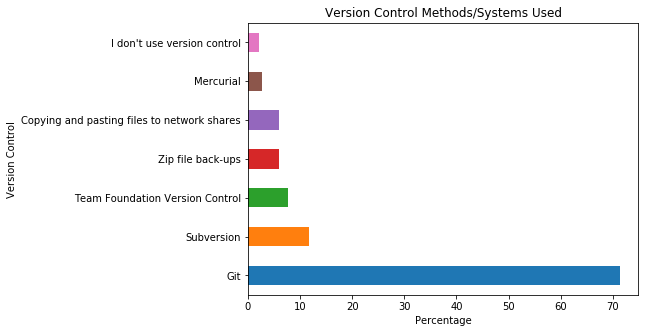

In [79]:
#Plot top version control system used
plot_bar_graph(get_split_count(data['VersionControl']),kind='barh',rot=0,title='Version Control Methods/Systems Used',figsize=(7,5),
              x_label='Percentage',y_label='Version Control')

A massive 70 % of the proportion use Git as their version control. This just goes to show how popular Git is in IT sector as a version control. It is followed by subversion with 10% only. And only 2 % of the people do not use version control methods /system.

> ***Percentage of people working as a Hobby***

It gives distribution on the percentage of people doing work in IT as a hobby.

In [80]:
data['Hobby'].isnull().sum()

0

Hobby is one of the few columns which do not have any missing values

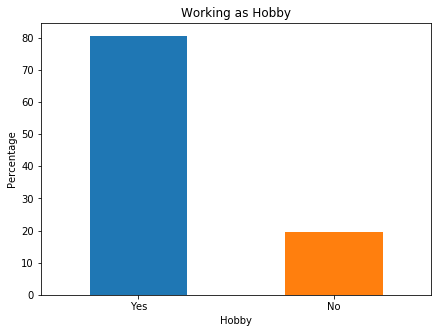

In [81]:
hobby_data=data['Hobby'].value_counts()/len(data)*100
plot_bar_graph(hobby_data,kind='bar',rot=0,title='Working as Hobby',figsize=(7,5),
              x_label='Hobby',y_label='Percentage')

It seems a lot of people working in startup/small scale IT firms are working as a hobby. About 80% of the proportion says they are working as a hobby.

> ***Conclusion***

Following points can be concluded from the above analysis :

* More than 30 % of currently employed people of IT firm work in startup/ small scale firms. Out of those 30 % , for about 80% of these people the work that they do is like a hobby.
* USA, India and Germany are the leading countries where these 30% people who are employed belong.
* Average working age of people can be said to be about 25–30 years with an average salary of about USD 85,000.00 .
* Java, HTML, CSS continue to be the top languages used . But we can expect some changes as preferences seem to be changing towards Python,C# etc.
* The most popular and widely used OS system used is Windows and for Version Control systems is Git.